## Supplementary Figure - 2019 Operations
Siobhan Powell, 2021.

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

Note: for 2019, only ran with storage before but dropped that from the naming

In [8]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals1 = np.zeros((6, 5)) # overgeneration
tables_dfs1 = pd.DataFrame(np.zeros((6, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

vals2 = np.zeros((6, 5)) # ramping
tables_dfs2 = pd.DataFrame(np.zeros((6, 5)), 
                          index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                          columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual'])

for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        penlevel = 1.0
        overgen = None
        try: 
            dpdf = pd.read_csv('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_dpdf_20211119.csv')
        except:
            try:
                dpdf = pd.read_csv('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')
            except: 
                print('Error for ', penlevel, scen1, scen2)
                
        try:
            overgen = pd.read_csv('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_overgeneration.csv')
        except:
            try: 
                overgen = pd.read_csv('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_overgeneration.csv')
            except:
                print('No overgeneration for ', scen1, scen2)
                    
        if overgen is not None:
            vals1[i, j] = np.abs(overgen.demand.sum())
            tables_dfs1.loc[scen1, scen2] = np.abs(overgen.demand.sum())
        
        prof1 = np.zeros((25, ))
        prof1[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0) # in original 
        prof1[24] = prof1[0]
        vals2[i, j] = np.max(prof1[1:] - prof1[:-1])
        tables_dfs2.loc[scen1, scen2] = np.max(prof1[1:] - prof1[:-1])
        
        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
overgen = None
try: 
    dpdf = pd.read_csv('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_dpdf_20211119.csv')
except:
    try:
        dpdf = pd.read_csv('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')
    except: 
        print('Error for ', penlevel, scen1, scen2)
        print('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')

try: 
    overgen = pd.read_csv('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_overgeneration.csv')
except:
    try: 
        overgen = pd.read_csv('Results/Run2019/fuel1_solar1_wind1_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_overgeneration.csv')
    except:
        print('No overgeneration for ', scen1, scen2)        
        
if overgen is not None:
    vals1[i, j] = np.abs(overgen.demand.sum())
    tables_dfs1.loc[scen1, scen2] = np.abs(overgen.demand.sum())

prof = np.zeros((25, ))
prof[np.arange(0, 24)] = dpdf['demand'].values.reshape(-1, 24).mean(axis=0)
prof[24] = prof[0]
vals2[i, j] = np.max(prof[1:] - prof[:-1])
tables_dfs2.loc[scen1, scen2] = np.max(prof[1:] - prof[:-1])        




No overgeneration for  _Timers9pm_noWPcontrol UniversalHome
No overgeneration for  _Timers9pm_noWPcontrol HighHome
No overgeneration for  _Timers9pm_noWPcontrol LowHome_HighWork
No overgeneration for  _Timers9pm_noWPcontrol LowHome_LowWork
No overgeneration for  _Timers12am_noWPcontrol UniversalHome
No overgeneration for  _Timers12am_noWPcontrol HighHome
No overgeneration for  _Timers12am_noWPcontrol LowHome_HighWork
No overgeneration for  _Timers12am_noWPcontrol LowHome_LowWork
No overgeneration for  _TimersNone_noWPcontrol UniversalHome
No overgeneration for  _TimersNone_noWPcontrol HighHome
No overgeneration for  _TimersNone_noWPcontrol LowHome_HighWork
No overgeneration for  _TimersNone_noWPcontrol LowHome_LowWork
No overgeneration for  _TimersNone_WPcontrol_minpeak UniversalHome
No overgeneration for  _TimersNone_WPcontrol_minpeak HighHome
No overgeneration for  _TimersNone_WPcontrol_minpeak LowHome_HighWork
No overgeneration for  _TimersNone_WPcontrol_minpeak LowHome_LowWork
No o

In [9]:
tables_dfs1*(1/1000)

,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_Timers9pm_noWPcontrol,0.0,0.0,0.0,0.0,0.0
_Timers12am_noWPcontrol,0.0,0.0,0.0,0.0,0.0
_TimersNone_noWPcontrol,0.0,0.0,0.0,0.0,0.0
_TimersNone_WPcontrol_minpeak,0.0,0.0,0.0,0.0,0.0
_TimersNone_WPcontrol_avgem,0.0,0.0,0.0,0.0,0.0
_TimersMixed_WPcontrol_minpeak,0.0,0.0,0.0,0.0,0.0


In [10]:
tables_dfs2*(1/1000)

,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BusinessAsUsual
_Timers9pm_noWPcontrol,9.807627,5.418055,4.114850,3.496267,0.000000
_Timers12am_noWPcontrol,3.072553,1.503525,3.814761,3.174160,0.000000
_TimersNone_noWPcontrol,3.191835,1.925843,4.082562,3.459811,0.000000
_TimersNone_WPcontrol_minpeak,3.588760,1.157290,4.231359,3.546312,0.000000
_TimersNone_WPcontrol_avgem,3.178124,1.679508,4.915115,3.181927,0.000000
_TimersMixed_WPcontrol_minpeak,0.000000,0.000000,0.000000,0.000000,1.068756


In [6]:
# (tables_dfs2*(1/1000)).round(2).to_csv('MainPlotting/Tables/fig5a_ramping.csv')
# (tables_dfs1*(1/1000)).round(2).to_csv('MainPlotting/Tables/fig5a_overgeneration.csv')

In [11]:
np.round((1/1000)*vals2, 2)

array([[9.81, 5.42, 4.11, 3.5 , 0.  ],
       [3.07, 1.5 , 3.81, 3.17, 0.  ],
       [3.19, 1.93, 4.08, 3.46, 0.  ],
       [3.59, 1.16, 4.23, 3.55, 0.  ],
       [3.18, 1.68, 4.92, 3.18, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.07]])

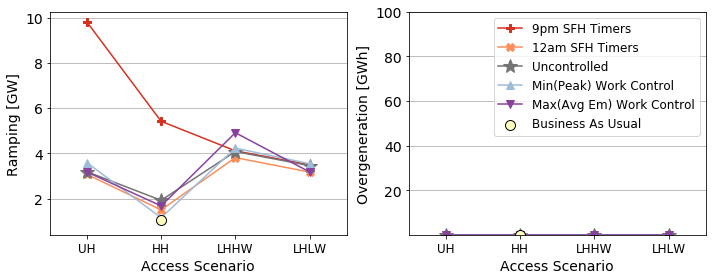

In [13]:
plt.figure(figsize=(10, 4))
titles = ['UH', 'HH', 'LHHW', 'LHLW']

colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Max(Avg Em) Work Control']

plt.subplot(121)
plt.xlabel('Access Scenario', fontsize=14)
plt.ylabel('Ramping [GW]', fontsize=14)
plt.xticks(np.arange(0, 4), labels=titles, fontsize=12)

ms = [8, 8, 14, 8, 8]
lines = ['-P', '-X', '-*', '-^','-v']
for control_idx in range(5):
    plt.plot(np.arange(0, 4), (1/1000)*vals2[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label=control_labels[control_idx], zorder=1, markersize=ms[control_idx])
# vals_up = [ramps_up1, ramps_up2, ramps_up0, ramps_up3, ramps_up4]
# for j, vals in enumerate(vals_up):
#     plt.plot(np.arange(0, 4), (1/1000)*vals, lines[j], color=colors[j], label=control_labels[j], zorder=1, markersize=ms[j])
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs2.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual')
plt.xlim([-0.5, 3.5])
plt.yticks(np.arange(2, 11, 2), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')


plt.subplot(122)


plt.xticks(np.arange(0, 4), labels=titles, fontsize=12)
plt.xlabel('Access Scenario', fontsize=14)
plt.yticks([20, 40, 60, 80, 100], fontsize=12)
plt.xlim([-0.5, 3.5])


lines = ['-P', '-X', '-*', '-^','-v']
ms = [8, 8, 14, 8, 8]
edgecolors=[colors[0], colors[1],'k', colors[2], colors[3]]
# vals_all = [vals1, vals2, vals0, vals3, vals4]
# for j, vals in enumerate(vals_all):
#     plt.plot(np.arange(0, 4), (1/1000)*vals[:, 8], lines[j], color=colors[j], label=control_labels[j], zorder=1, markersize=ms[j])
for control_idx in range(5):
    plt.plot(np.arange(0, 4), (1/1000)*vals1[control_idx, np.arange(0, 4)], lines[control_idx], color=colors[control_idx], label=control_labels[control_idx], zorder=1, markersize=ms[control_idx])
plt.ylabel('Overgeneration [GWh]', fontsize=14)
# plt.scatter(np.array([1]), np.array((1/1000)*vals_bau[8]), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual')
plt.scatter(np.array([1]), np.array((1/1000)*tables_dfs1.loc['_TimersMixed_WPcontrol_minpeak', 'BusinessAsUsual']), marker='o', color='#ffffbf', edgecolors='k', s=100, zorder=2, label='Business As Usual')
            
plt.legend(fontsize=12)
plt.yticks(np.arange(20, 110, 20), fontsize=14)
plt.gca().set_axisbelow(True)        
plt.gca().grid(axis='y')

plt.tight_layout()
plt.savefig('SupplementPlotting/Plots/supfig15.pdf', bbox_inches='tight')
plt.show()